In [16]:
import numpy as np
from keras.datasets import mnist

In [44]:
mnist_data = mnist.load_data()
(train_images,train_labels), (test_images,test_labels) =mnist_data


In [45]:
print((train_images.shape))
print((train_labels.shape))
print(len(test_images))
print(len(test_labels))

(60000, 28, 28)
(60000,)
10000
10000


In [46]:
### Check what kind of tensor is our training data

In [47]:
#1. dimension/rank/number of axis of the tensor
train_images.ndim

3

In [48]:
#2. shape of the tensor
train_images.shape

(60000, 28, 28)

In [49]:
#3. type of data in the tensor (eg. float32, uint8, float64 etc)
train_images.dtype

dtype('uint8')

In [50]:
##### So it is a 3D tensor of 60000 examples of 8 but integers

In [51]:
np.unique(train_images) ### Values of the image tensor range between 0 and 255, so it is a greyscale image

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

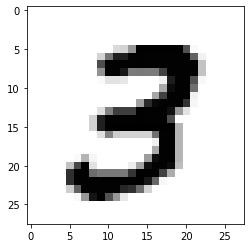

In [54]:
### Displaying an example from the training image set
import matplotlib.pyplot as plt

digit = train_images[7]
plt.imshow(digit, cmap= plt.cm.binary)
plt.show()

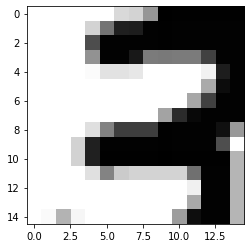

In [57]:
digit2 = train_images[7, 5:20, 5:20]
plt.imshow(digit2, cmap= plt.cm.binary)
plt.show()

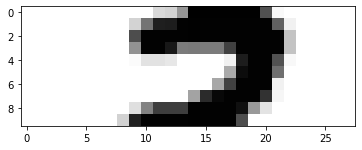

In [58]:
digit3 = train_images[7, 5:15, :]
plt.imshow(digit3, cmap= plt.cm.binary)
plt.show()

In [25]:
### Preparing the training and test data for network--- 
#1. change the shape of the array given 
#2. and normalize the values of the data to be between 0 and 1
#3. converting the labels into categorical encoded

In [29]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

In [32]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [33]:
from keras.utils import to_categorical

In [35]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [38]:
train_labels.shape

(60000, 10)

In [20]:
### Building the architecture of Neural network
from keras import models
from keras import layers

In [21]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [22]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
### Compilation step to pick three more things:
#1. loss function to measure the performance on training data 
#2. optimizer for mechanism to update itself based on data and loss function
#3. Metric to monitor training and testing -- eg accuracy

In [24]:
network.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
### Now we can fit the model

In [40]:
network.fit(train_images, train_labels, epochs=5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.2571 - acc: 0.9251
Epoch 2/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.1037 - acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0681 - acc: 0.9802
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0489 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0371 - acc: 0.9892


In [41]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

10000/10000 [==============================] - 1s 97us/step
test_acc: 0.9785
test_loss: 0.07004580657437909
